In [56]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv("exoPlanets.csv")
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [58]:
df["LABEL"] = (df['LABEL'] == 2).astype(int)

In [59]:
df["LABEL"].unique()

array([1, 0])

In [60]:
notExoplanets = df["LABEL"].value_counts()[0]
exoplanets = df["LABEL"].value_counts()[1]
dfLength = len(df)

print("notExoplanets = ", notExoplanets, " exoplanets = ", exoplanets, " total = ", dfLength)

notExoplanets =  5050  exoplanets =  37  total =  5087


In [61]:
df.isnull().sum().sum()  # so no null values

0

In [62]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])
train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
3495,0,-753.47,-652.03,-646.56,-230.94,-544.53,-544.41,-596.69,-643.03,-624.81,...,-5722.66,-5819.47,-5946.59,-6002.09,-6095.00,-6145.25,-4830.47,-5032.06,-5179.31,-5364.50
2224,0,-3.43,-2.65,-3.09,-6.08,0.86,-4.96,-3.69,-2.10,-6.73,...,11.25,23.29,19.85,17.98,21.09,17.56,-9.05,-12.90,-5.18,-6.14
3177,0,-5.83,10.85,-9.84,2.71,-15.81,-21.68,2.36,-10.95,-9.67,...,16.78,11.99,7.58,-22.04,-6.50,-36.64,14.02,3.46,13.94,25.61
3520,0,210.50,162.72,148.73,144.62,150.96,70.64,55.06,70.12,67.70,...,-21.68,-78.74,-142.32,-176.99,-224.43,-282.02,-315.21,-308.97,-238.11,-188.83
847,0,18.65,16.84,15.63,18.33,11.09,3.07,22.36,9.37,7.50,...,-1.73,-5.51,-5.07,-5.26,2.62,0.22,2.59,4.54,6.95,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0,-14.04,-14.83,-2.03,-12.76,-18.46,-23.21,-13.34,-6.31,-2.88,...,0.93,-1.61,-12.16,-25.88,-19.52,-14.48,-5.44,7.09,27.98,13.57
1978,0,4.56,2.24,2.03,2.70,1.08,-1.82,3.14,-5.74,1.12,...,-3.13,1.13,-2.33,-5.08,-3.14,1.24,-0.64,-4.09,-4.88,-3.38
608,0,24.16,15.72,5.16,26.67,51.47,24.30,-8.56,-52.33,-70.18,...,-57.67,-1.34,-23.15,-67.59,30.49,10.02,39.89,51.71,3.17,40.99
2336,0,-12.72,-26.92,-25.28,-39.95,-29.17,-13.33,26.67,3.52,0.28,...,-48.58,-51.87,-38.81,-61.95,-28.39,-54.40,-42.44,-62.58,-80.29,-43.25


In [63]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [64]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[1:]].values
    Y = dataframe[dataframe.columns[0]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    return data, X, Y

In [65]:
train, X_train, Y_train = scale_dataset(train, oversample = True)
valid, X_valid, Y_valid = scale_dataset(valid)
test, X_test, Y_test = scale_dataset(test)

In [66]:
np.unique(Y_train)

array([0, 1])

In [67]:
from sklearn.metrics import classification_report

In [68]:
from sklearn.svm import SVC

In [69]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [70]:
y_predict = svm_model.predict(X_test)
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1013
           1       0.00      0.00      0.00         5

    accuracy                           0.99      1018
   macro avg       0.50      0.50      0.50      1018
weighted avg       0.99      0.99      0.99      1018



In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [75]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [78]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(3197, )),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    history = nn_model.fit(
    X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


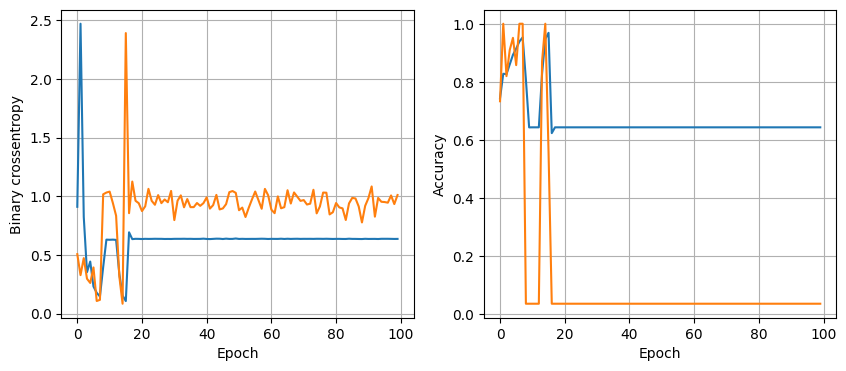

32/32 [==============================] - 0s 1ms/step - loss: 0.8194 - accuracy: 0.9902
16 nodes, dropout 0, lr 0.1, batch size 64


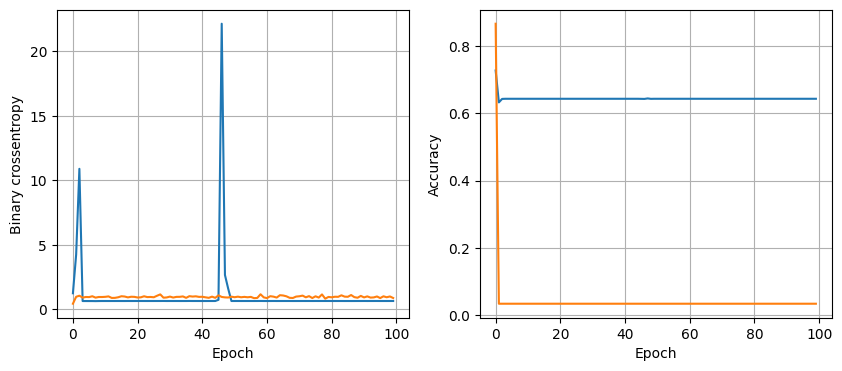

32/32 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.9912
16 nodes, dropout 0, lr 0.1, batch size 128


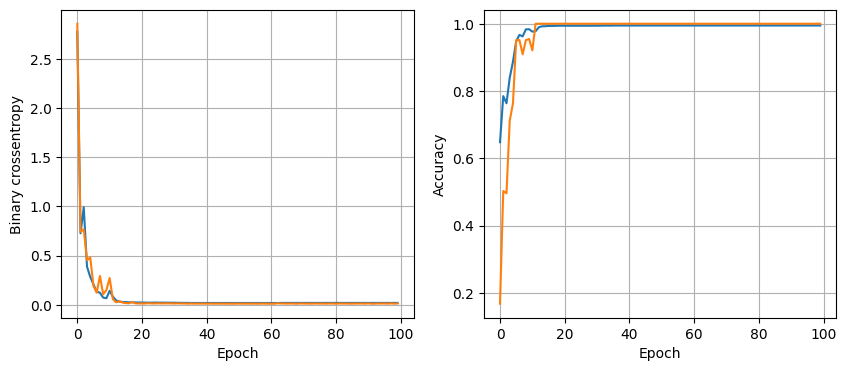

32/32 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.9263
16 nodes, dropout 0, lr 0.005, batch size 32


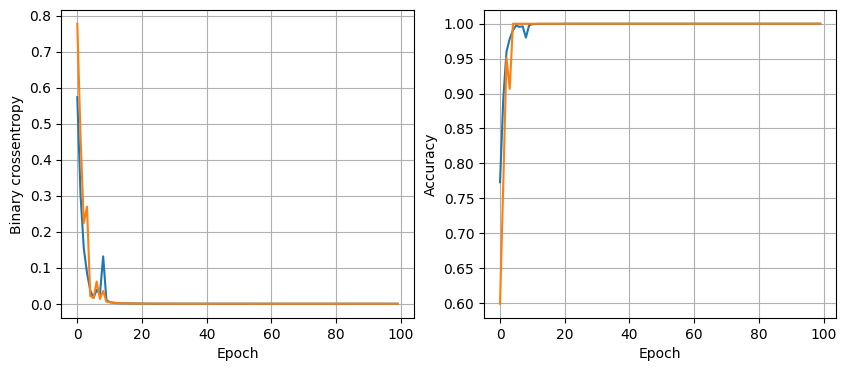

32/32 [==============================] - 0s 1ms/step - loss: 1.4411 - accuracy: 0.9872
16 nodes, dropout 0, lr 0.005, batch size 64


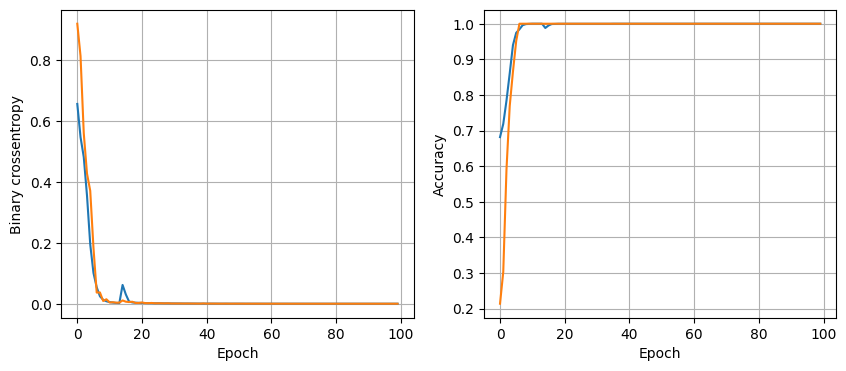

32/32 [==============================] - 0s 2ms/step - loss: 4.0542 - accuracy: 0.9882
16 nodes, dropout 0, lr 0.005, batch size 128


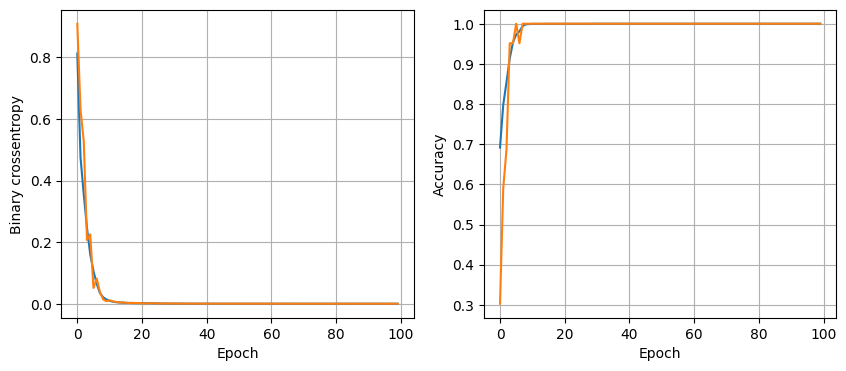

32/32 [==============================] - 0s 948us/step - loss: 0.5509 - accuracy: 0.9892
16 nodes, dropout 0, lr 0.001, batch size 32


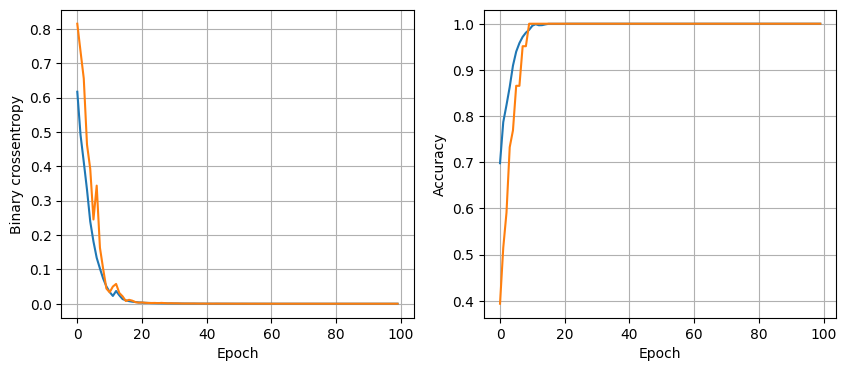

32/32 [==============================] - 0s 1ms/step - loss: 3.1278 - accuracy: 0.9872
16 nodes, dropout 0, lr 0.001, batch size 64


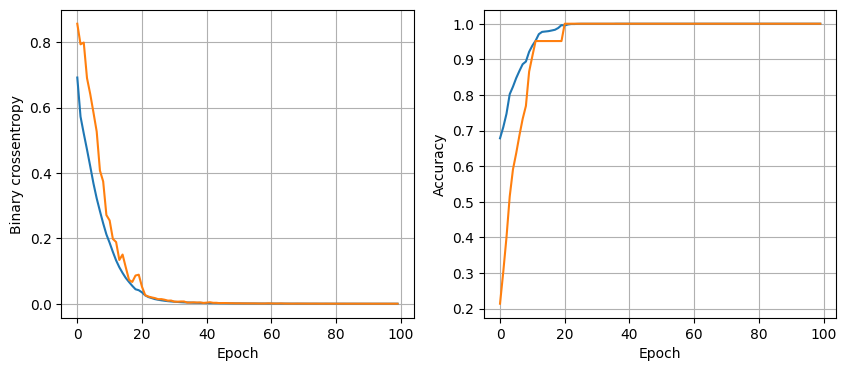

32/32 [==============================] - 0s 2ms/step - loss: 1.7353 - accuracy: 0.9862
16 nodes, dropout 0, lr 0.001, batch size 128


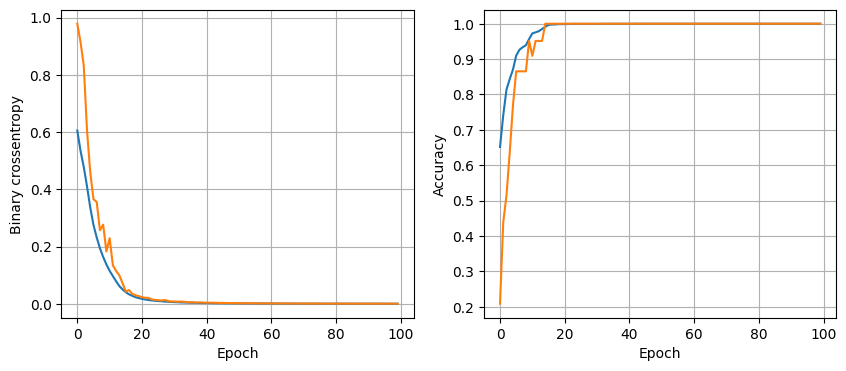

32/32 [==============================] - 0s 1ms/step - loss: 0.7308 - accuracy: 0.9862
16 nodes, dropout 0.2, lr 0.1, batch size 32


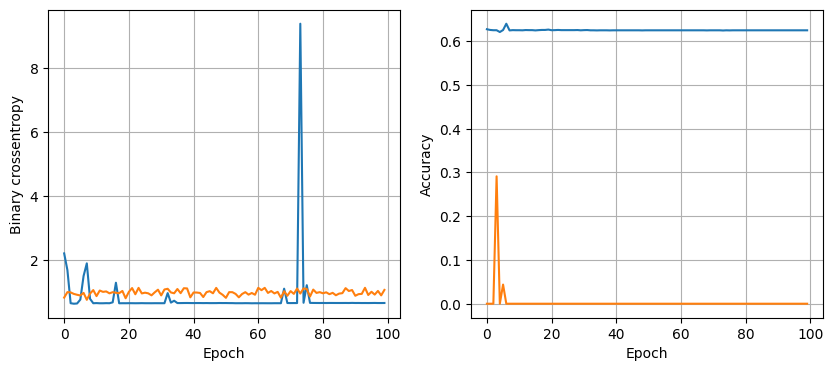

32/32 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.9912
16 nodes, dropout 0.2, lr 0.1, batch size 64


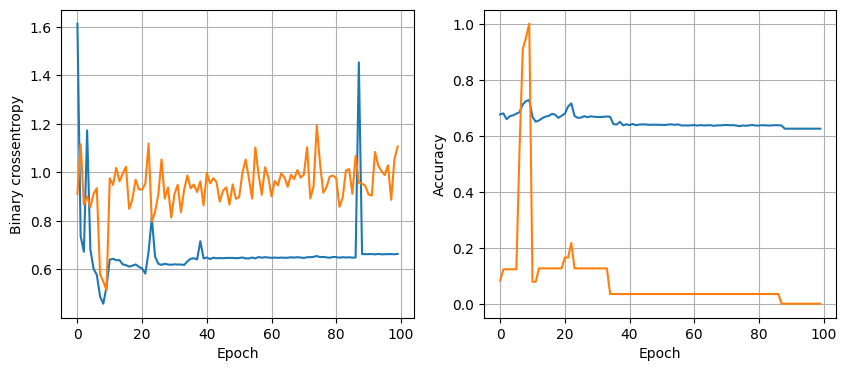

32/32 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.9912
16 nodes, dropout 0.2, lr 0.1, batch size 128


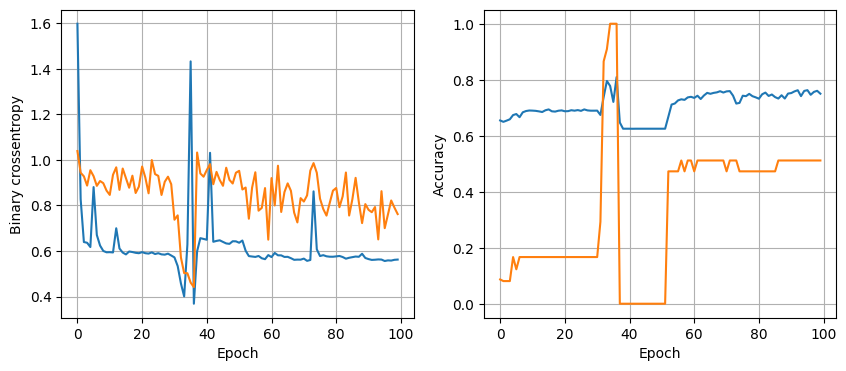

32/32 [==============================] - 0s 1ms/step - loss: 1.4287 - accuracy: 0.0993
16 nodes, dropout 0.2, lr 0.005, batch size 32


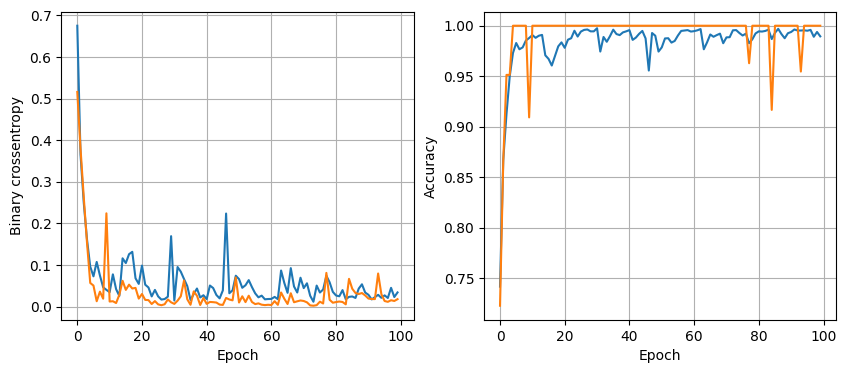

32/32 [==============================] - 0s 2ms/step - loss: 1.4926 - accuracy: 0.9912
16 nodes, dropout 0.2, lr 0.005, batch size 64


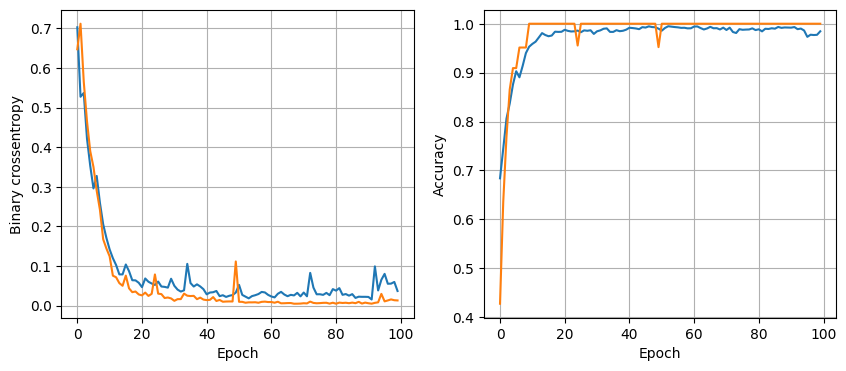

32/32 [==============================] - 0s 2ms/step - loss: 1.0510 - accuracy: 0.9902
16 nodes, dropout 0.2, lr 0.005, batch size 128


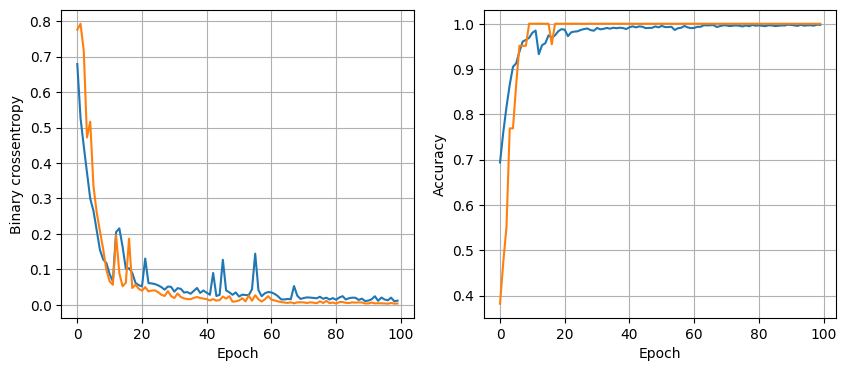

32/32 [==============================] - 0s 2ms/step - loss: 1.1785 - accuracy: 0.9892
16 nodes, dropout 0.2, lr 0.001, batch size 32


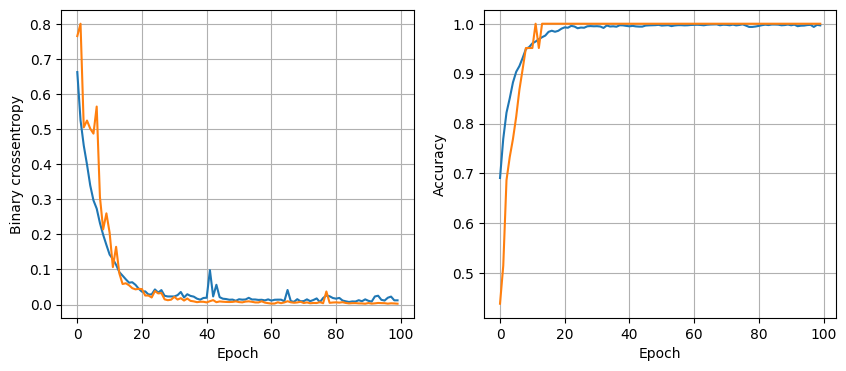

32/32 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.9902
16 nodes, dropout 0.2, lr 0.001, batch size 64


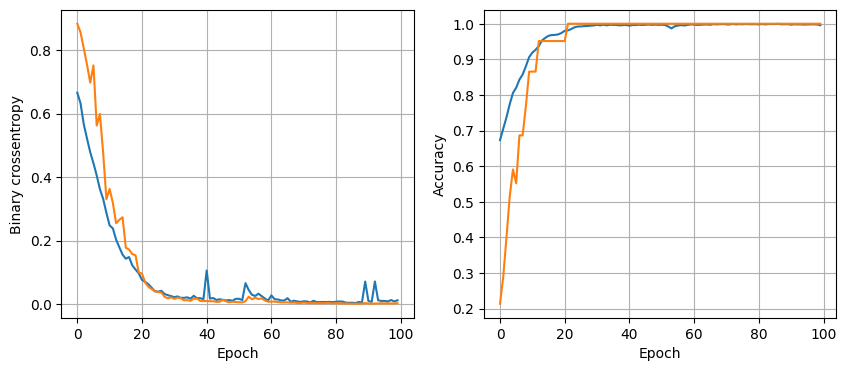

32/32 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.9912
16 nodes, dropout 0.2, lr 0.001, batch size 128


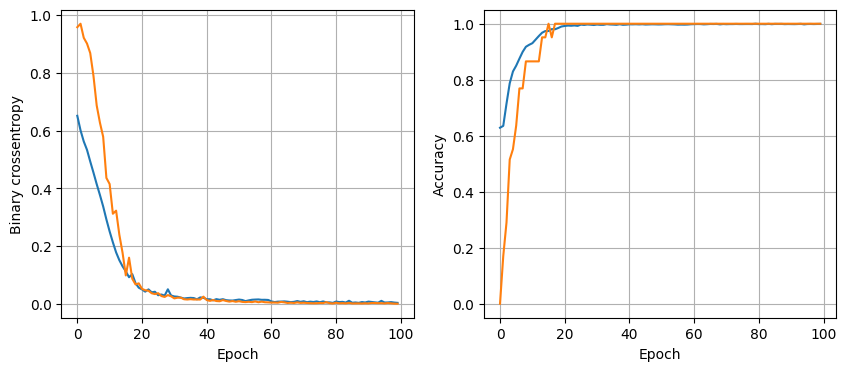

32/32 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.9912
32 nodes, dropout 0, lr 0.1, batch size 32


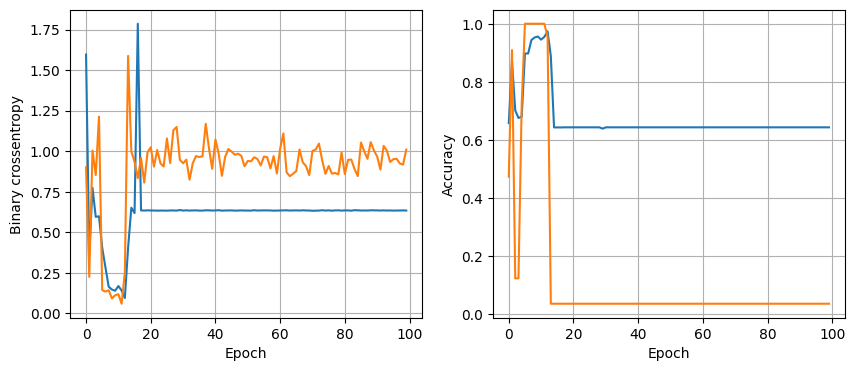

32/32 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.9912
32 nodes, dropout 0, lr 0.1, batch size 64


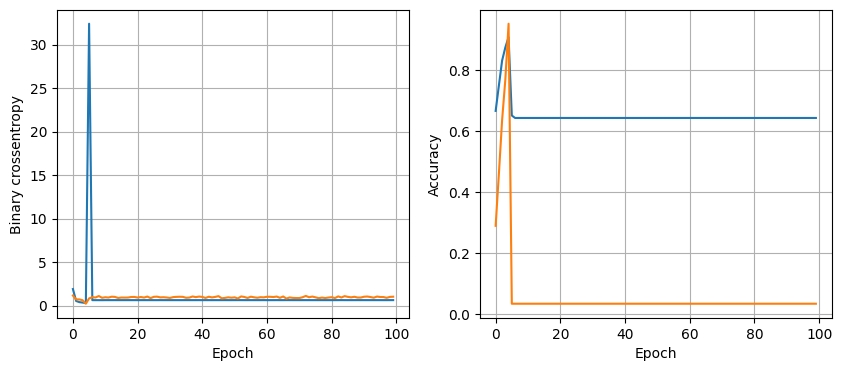

32/32 [==============================] - 0s 2ms/step - loss: 0.9822 - accuracy: 0.9902
32 nodes, dropout 0, lr 0.1, batch size 128


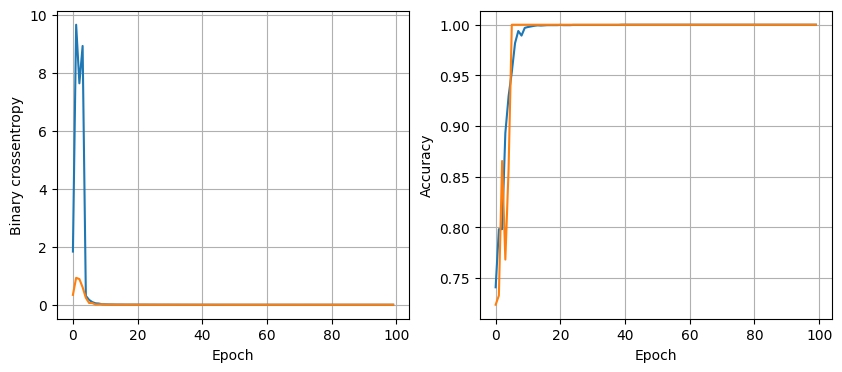

32/32 [==============================] - 0s 2ms/step - loss: 1.6220 - accuracy: 0.9813
32 nodes, dropout 0, lr 0.005, batch size 32


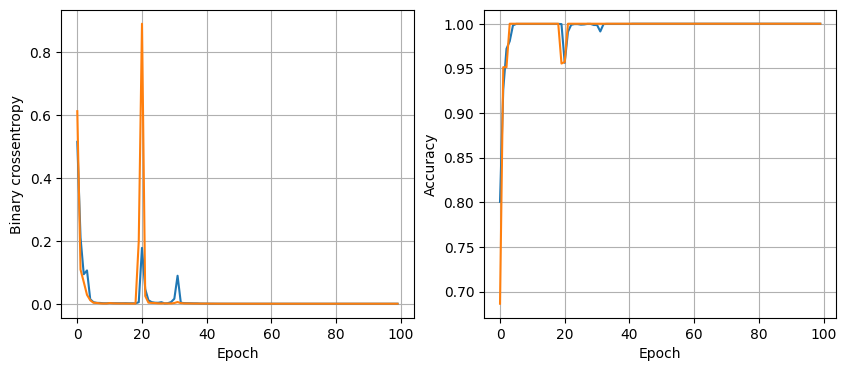

32/32 [==============================] - 0s 2ms/step - loss: 3.0025 - accuracy: 0.9892
32 nodes, dropout 0, lr 0.005, batch size 64


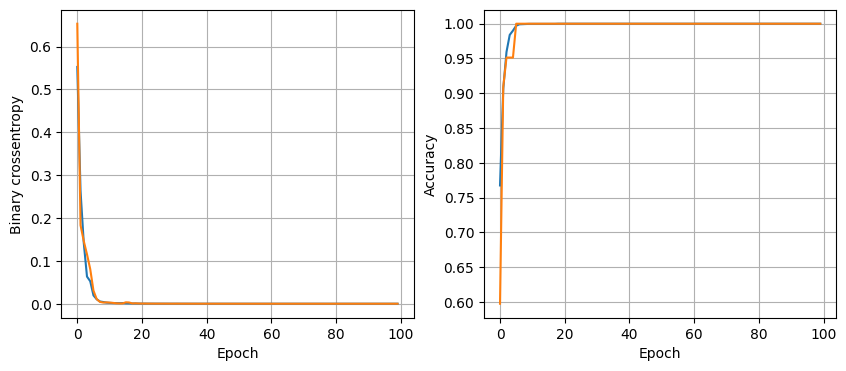

32/32 [==============================] - 0s 1ms/step - loss: 1.7323 - accuracy: 0.9892
32 nodes, dropout 0, lr 0.005, batch size 128


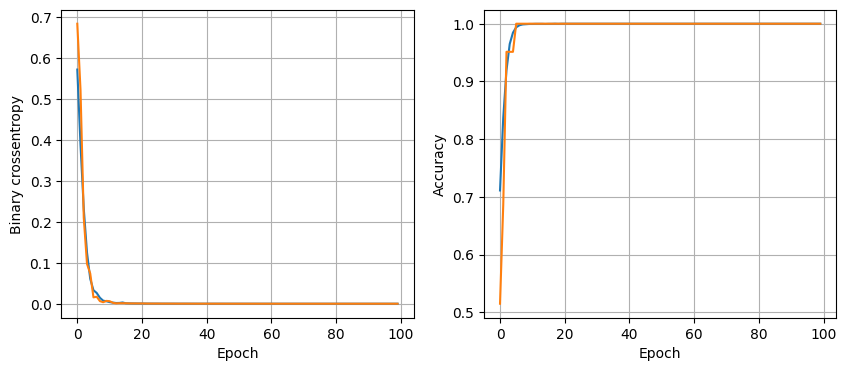

32/32 [==============================] - 0s 1ms/step - loss: 3.8155 - accuracy: 0.9892
32 nodes, dropout 0, lr 0.001, batch size 32


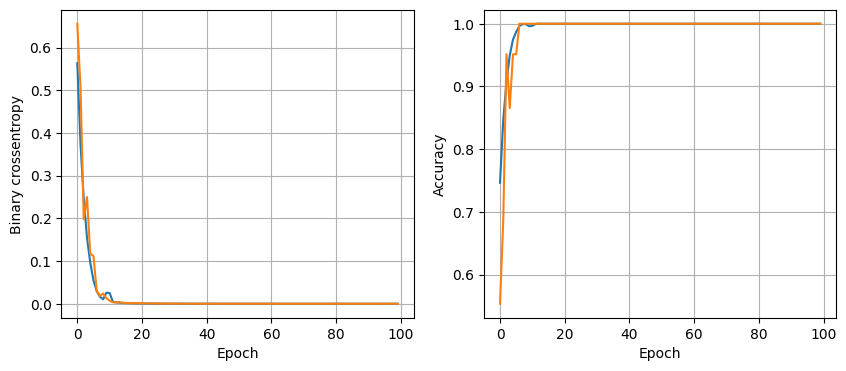

32/32 [==============================] - 0s 1ms/step - loss: 2.8342 - accuracy: 0.9862
32 nodes, dropout 0, lr 0.001, batch size 64


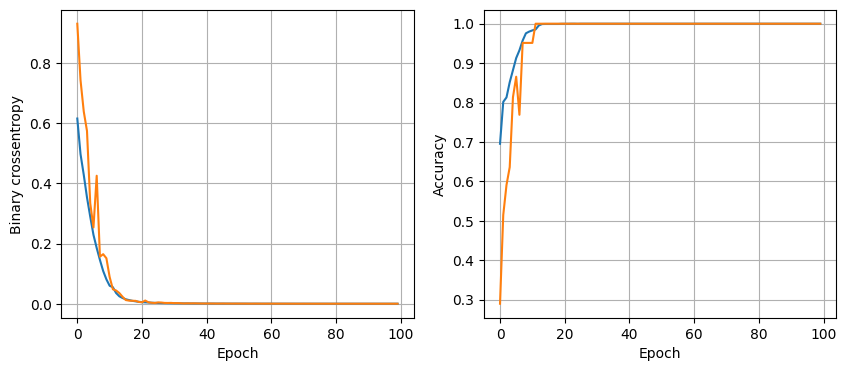

32/32 [==============================] - 0s 2ms/step - loss: 3.4591 - accuracy: 0.9813
32 nodes, dropout 0, lr 0.001, batch size 128


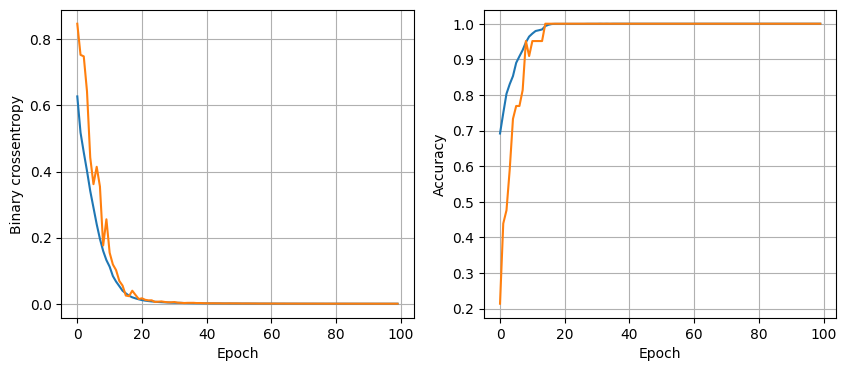

32/32 [==============================] - 0s 1ms/step - loss: 0.8583 - accuracy: 0.9862
32 nodes, dropout 0.2, lr 0.1, batch size 32


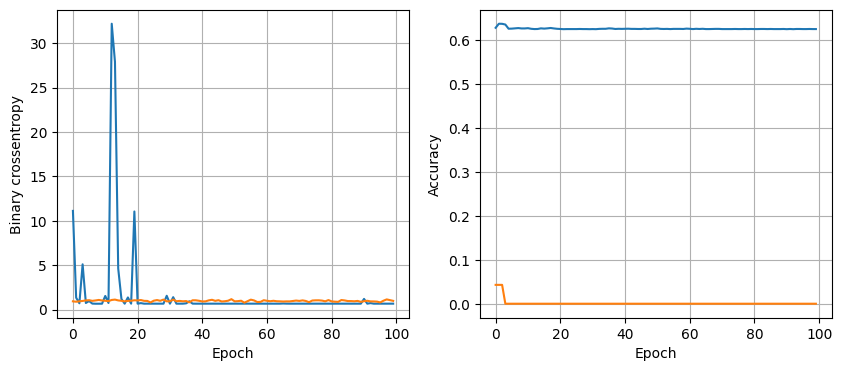

32/32 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.9912
32 nodes, dropout 0.2, lr 0.1, batch size 64


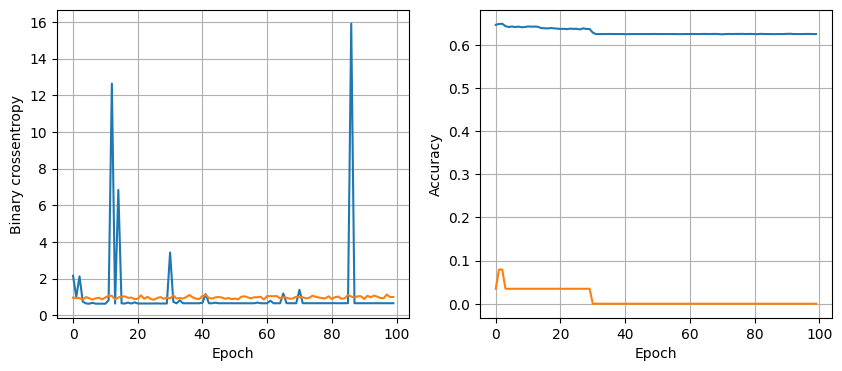

32/32 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.9912
32 nodes, dropout 0.2, lr 0.1, batch size 128


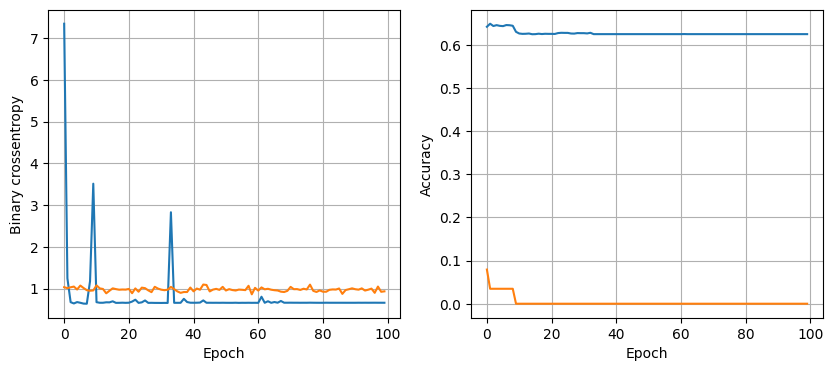

32/32 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.9912
32 nodes, dropout 0.2, lr 0.005, batch size 32


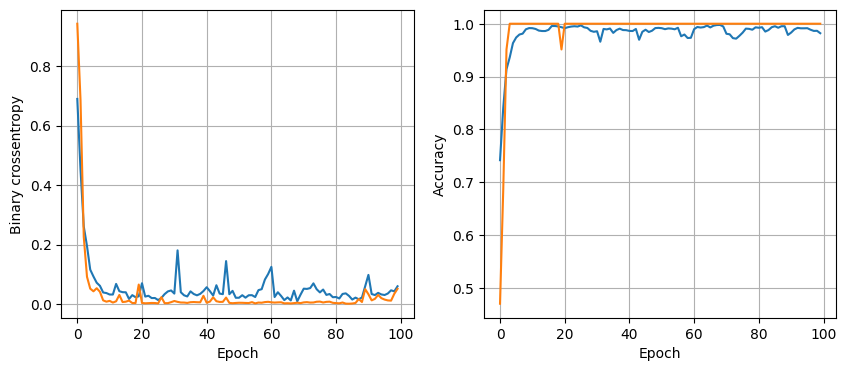

32/32 [==============================] - 0s 2ms/step - loss: 1.6246 - accuracy: 0.9912
32 nodes, dropout 0.2, lr 0.005, batch size 64


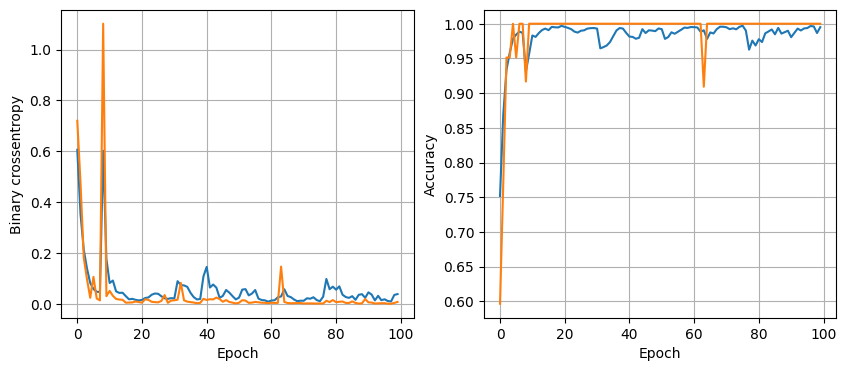

32/32 [==============================] - 0s 2ms/step - loss: 2.2000 - accuracy: 0.9892
32 nodes, dropout 0.2, lr 0.005, batch size 128


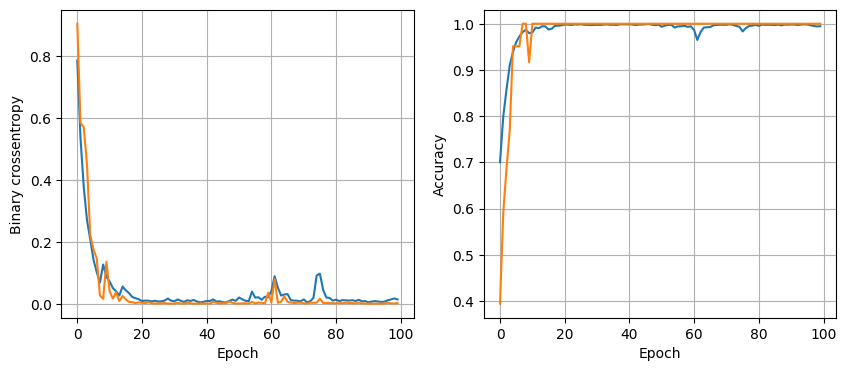

32/32 [==============================] - 0s 2ms/step - loss: 4.0384 - accuracy: 0.9892
32 nodes, dropout 0.2, lr 0.001, batch size 32


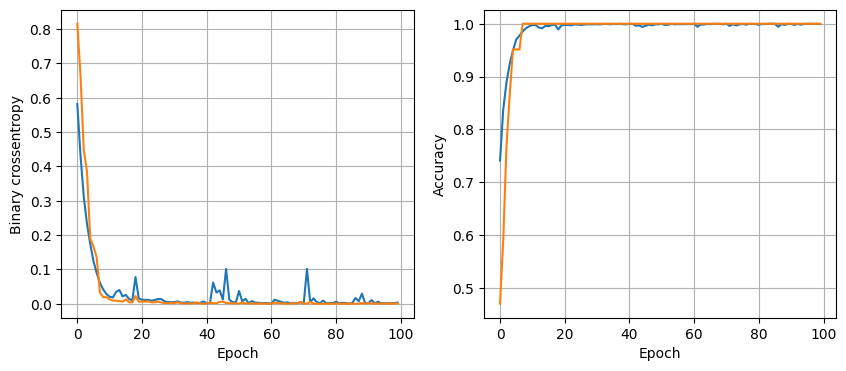

32/32 [==============================] - 0s 1ms/step - loss: 1.8889 - accuracy: 0.9902
32 nodes, dropout 0.2, lr 0.001, batch size 64


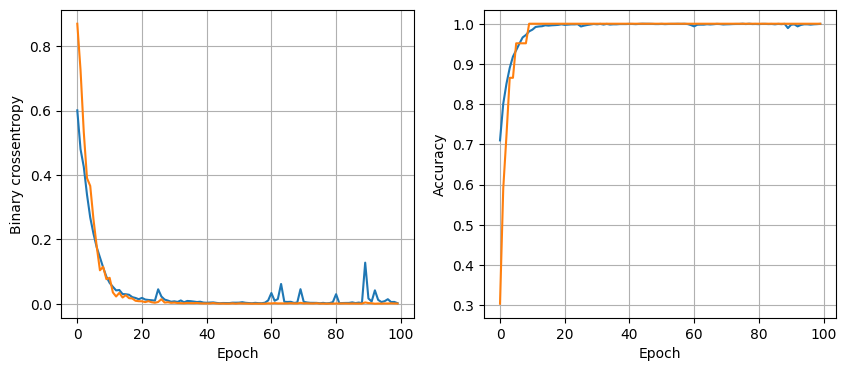

32/32 [==============================] - 0s 2ms/step - loss: 1.0850 - accuracy: 0.9902
32 nodes, dropout 0.2, lr 0.001, batch size 128


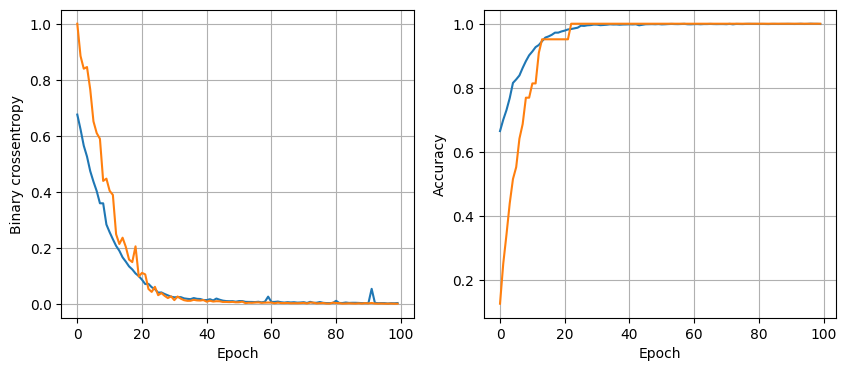

32/32 [==============================] - 0s 2ms/step - loss: 1.4133 - accuracy: 0.9892
64 nodes, dropout 0, lr 0.1, batch size 32


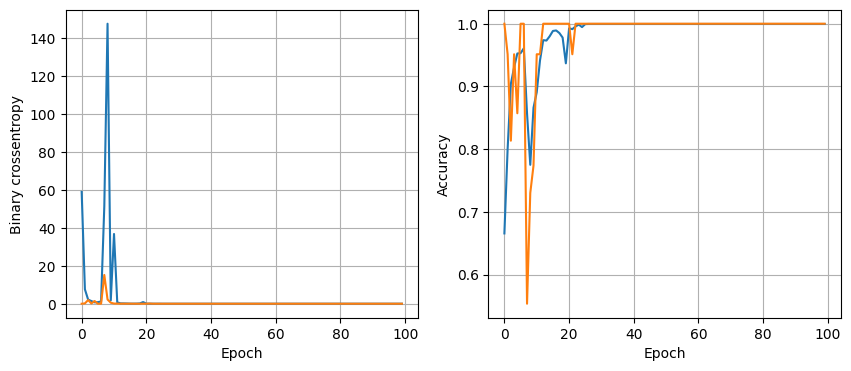

32/32 [==============================] - 0s 2ms/step - loss: 56.0138 - accuracy: 0.9862
64 nodes, dropout 0, lr 0.1, batch size 64


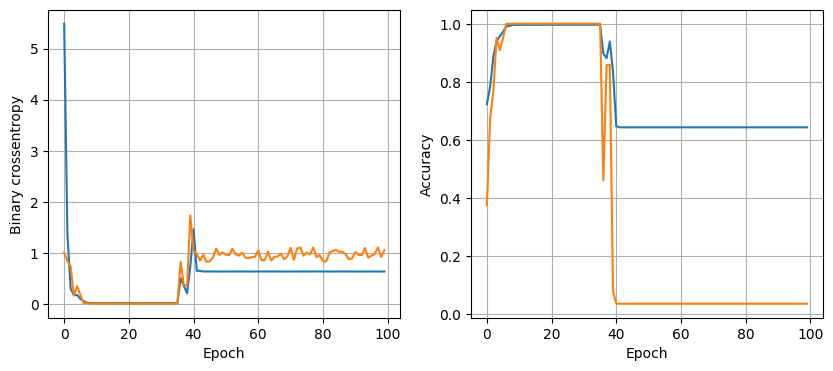

32/32 [==============================] - 0s 2ms/step - loss: 26.1406 - accuracy: 0.9892
64 nodes, dropout 0, lr 0.1, batch size 128


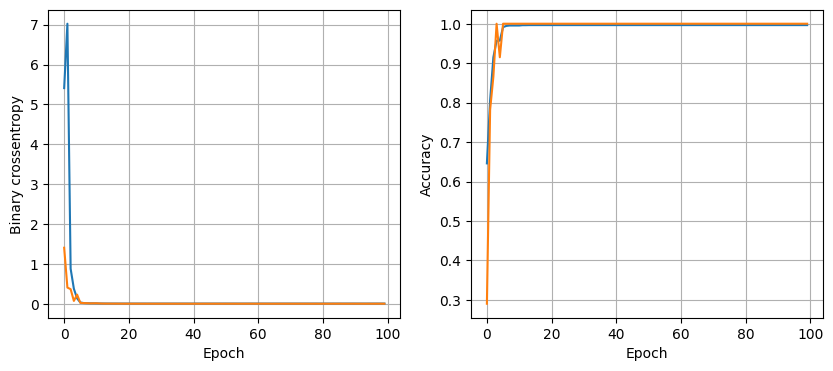

32/32 [==============================] - 0s 2ms/step - loss: 22.7787 - accuracy: 0.9764
64 nodes, dropout 0, lr 0.005, batch size 32


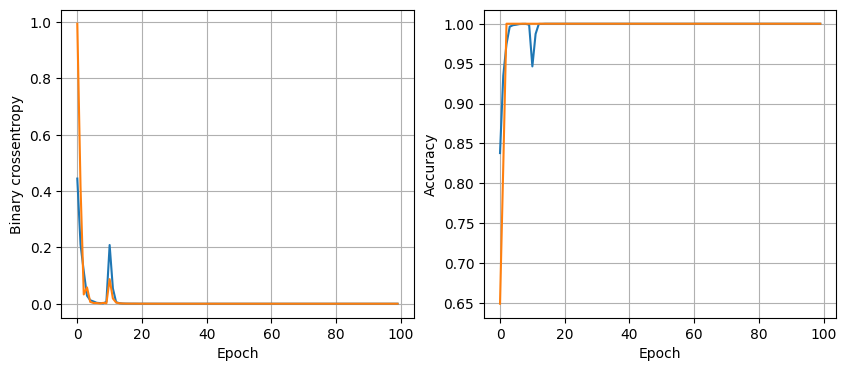

32/32 [==============================] - 0s 1ms/step - loss: 1.1017 - accuracy: 0.9892
64 nodes, dropout 0, lr 0.005, batch size 64


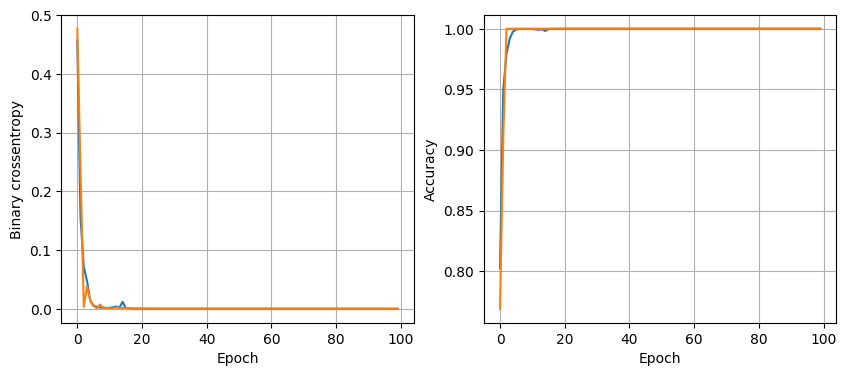

32/32 [==============================] - 0s 2ms/step - loss: 2.7905 - accuracy: 0.9862
64 nodes, dropout 0, lr 0.005, batch size 128


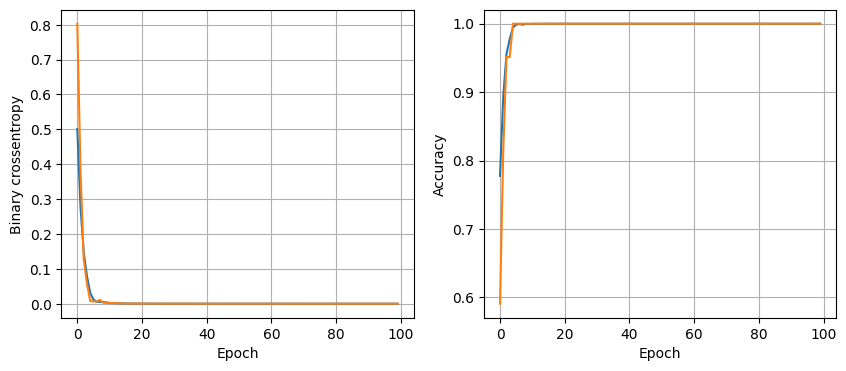

32/32 [==============================] - 0s 1ms/step - loss: 3.1531 - accuracy: 0.9843
64 nodes, dropout 0, lr 0.001, batch size 32


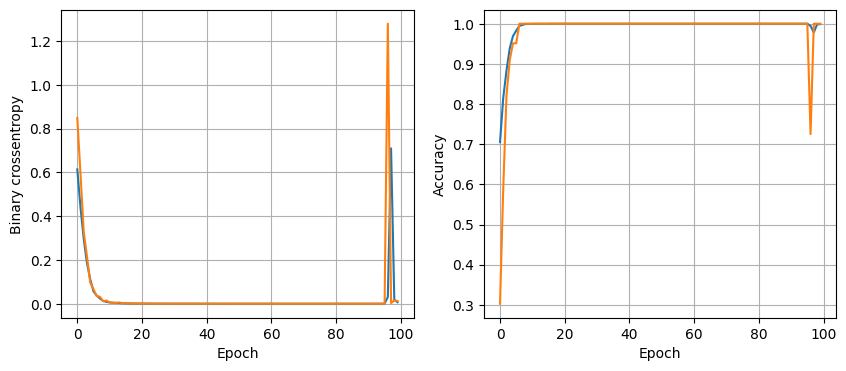

32/32 [==============================] - 0s 2ms/step - loss: 3.2178 - accuracy: 0.9862
64 nodes, dropout 0, lr 0.001, batch size 64


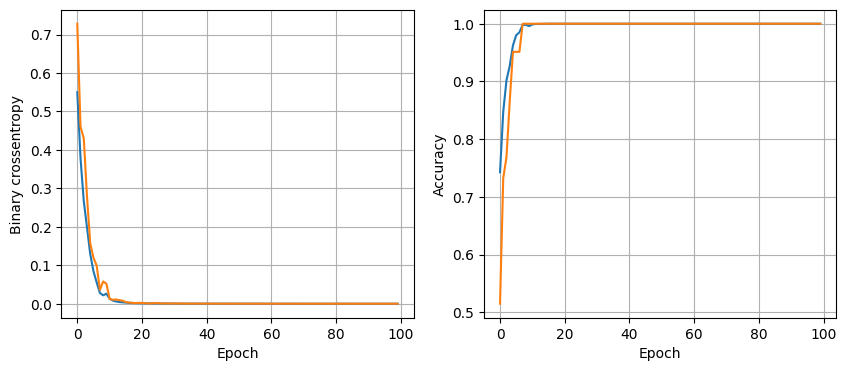

32/32 [==============================] - 0s 2ms/step - loss: 2.3751 - accuracy: 0.9892
64 nodes, dropout 0, lr 0.001, batch size 128


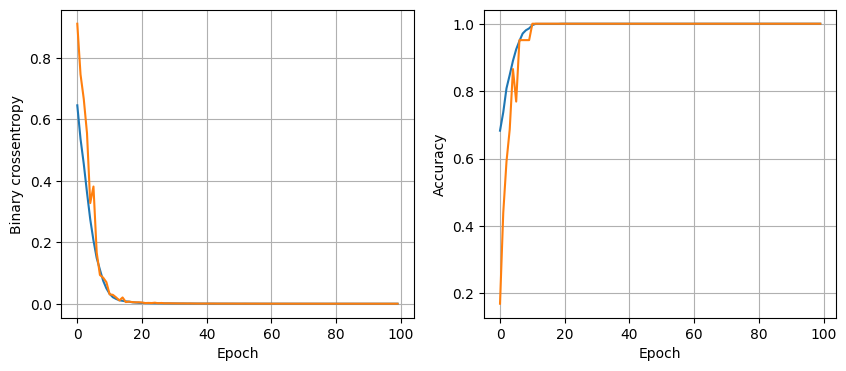

32/32 [==============================] - 0s 2ms/step - loss: 2.0968 - accuracy: 0.9843
64 nodes, dropout 0.2, lr 0.1, batch size 32


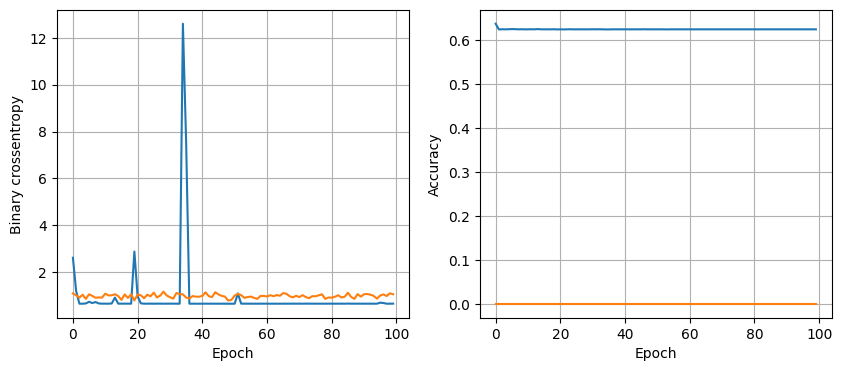

32/32 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.9912
64 nodes, dropout 0.2, lr 0.1, batch size 64


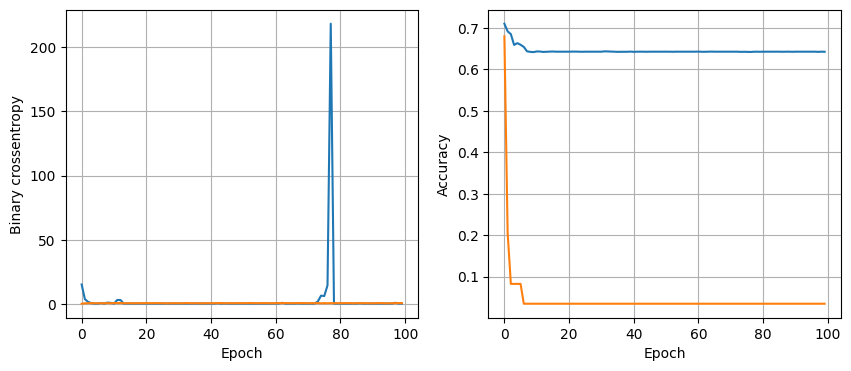

32/32 [==============================] - 0s 2ms/step - loss: 10.4190 - accuracy: 0.9912
64 nodes, dropout 0.2, lr 0.1, batch size 128


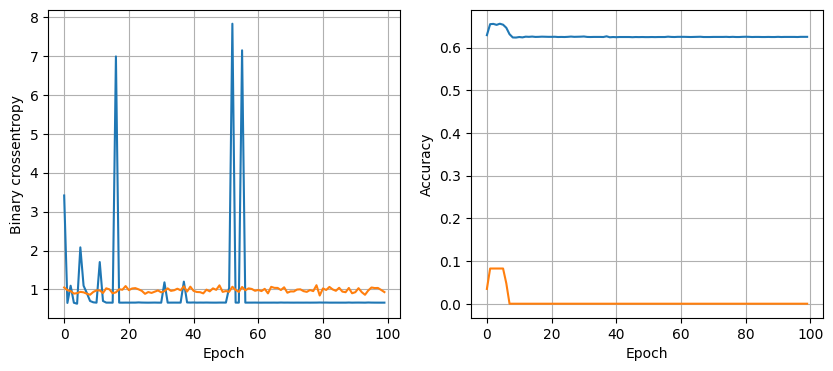

32/32 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.9912
64 nodes, dropout 0.2, lr 0.005, batch size 32


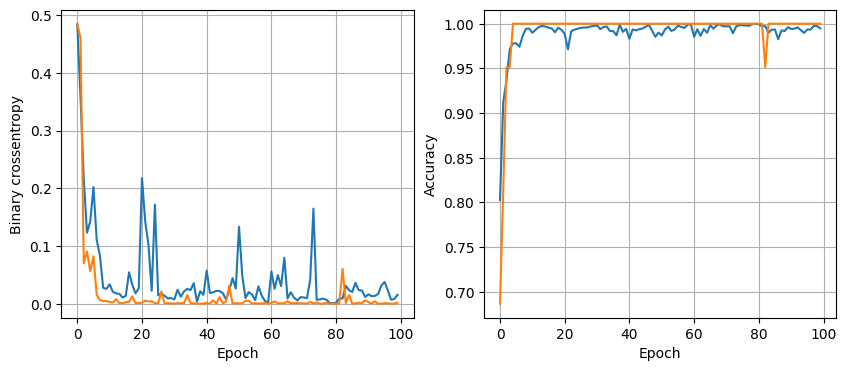

32/32 [==============================] - 0s 2ms/step - loss: 1.7197 - accuracy: 0.9902
64 nodes, dropout 0.2, lr 0.005, batch size 64


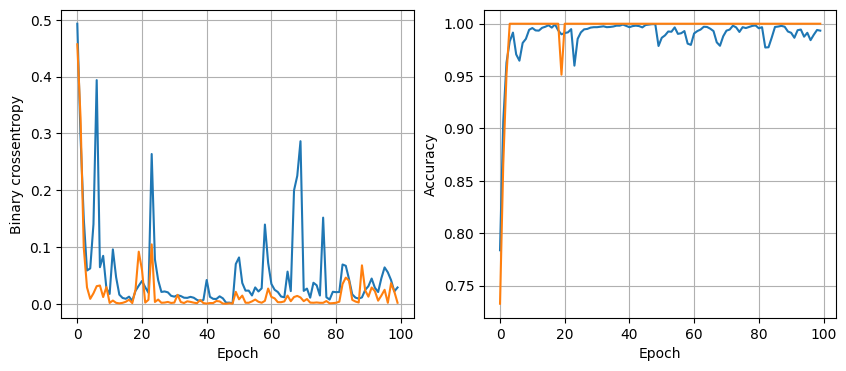

32/32 [==============================] - 0s 2ms/step - loss: 2.7325 - accuracy: 0.9892
64 nodes, dropout 0.2, lr 0.005, batch size 128


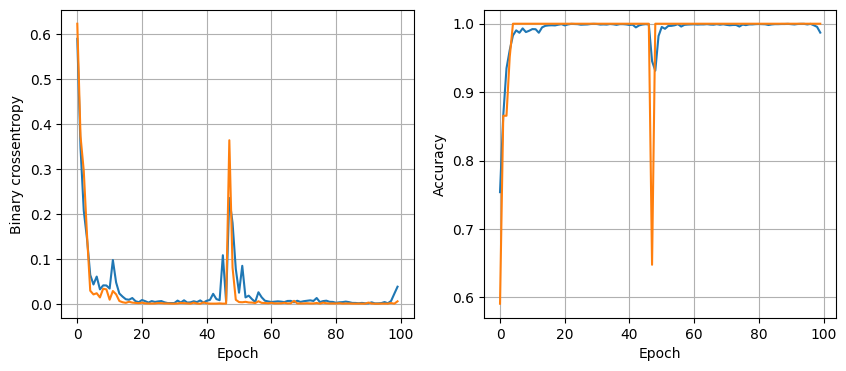

32/32 [==============================] - 0s 1ms/step - loss: 1.6296 - accuracy: 0.9892
64 nodes, dropout 0.2, lr 0.001, batch size 32


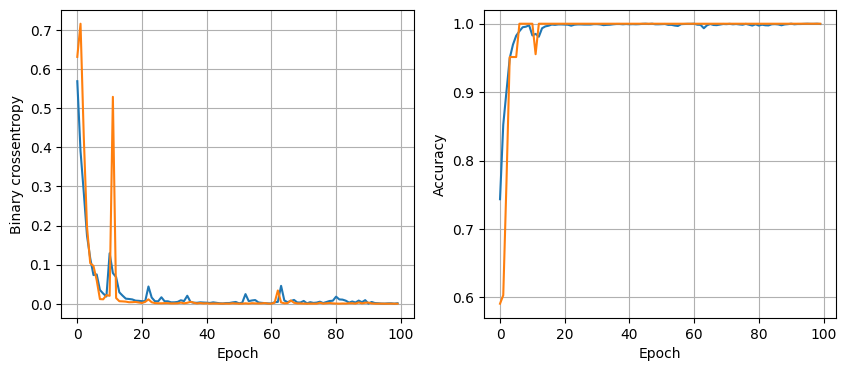

32/32 [==============================] - 0s 2ms/step - loss: 2.9425 - accuracy: 0.9882
64 nodes, dropout 0.2, lr 0.001, batch size 64


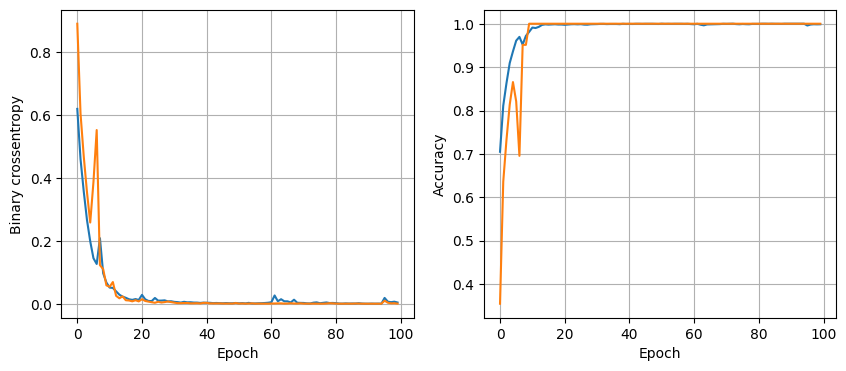

32/32 [==============================] - 0s 2ms/step - loss: 3.1185 - accuracy: 0.9902
64 nodes, dropout 0.2, lr 0.001, batch size 128


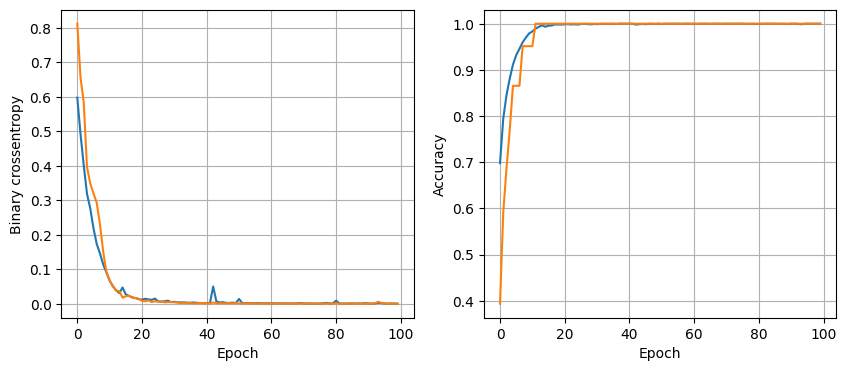

32/32 [==============================] - 0s 1ms/step - loss: 1.0884 - accuracy: 0.9902


In [79]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
                model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, Y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model

In [84]:
y_predict = least_loss_model.predict(X_test)
y_predict = (y_predict > 0.5).astype(int).reshape(-1, )
y_predict

32/32 [==============================] - 0s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [85]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1013
           1       0.00      0.00      0.00         5

    accuracy                           1.00      1018
   macro avg       0.50      0.50      0.50      1018
weighted avg       0.99      1.00      0.99      1018



c:\Users\kanishk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanishk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanishk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av